## Initial setup

### Data

### Cross entropy loss

## Basic training loop

(tensor([-0.1291, -0.0693,  0.1564,  0.0707,  0.0950, -0.1403,  0.0764,  0.0090,
         -0.1503, -0.0179], grad_fn=<SelectBackward>), torch.Size([64, 10]))

tensor(2.3032, grad_fn=<NllLossBackward>)

tensor(0.1094)

(tensor(0.2518, grad_fn=<NllLossBackward>), tensor(0.9375))

## Using parameters and optim

### Parameters

Use `nn.Module.__setattr__` and move relu to functional:

l1: Linear(in_features=784, out_features=50, bias=True)
l2: Linear(in_features=50, out_features=10, bias=True)


Linear(in_features=784, out_features=50, bias=True)

Model(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

(tensor(0.2026, grad_fn=<NllLossBackward>), tensor(0.9375))

### Registering modules

We can use the original `layers` approach, but we have to register the modules.

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU()
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

### nn.ModuleList

`nn.ModuleList` does this for us.

(tensor(0.1905, grad_fn=<NllLossBackward>), tensor(0.9375))

### nn.Sequential

`nn.Sequential` is a convenient class which does the same as the above:

(tensor(0.0420, grad_fn=<NllLossBackward>), tensor(1.))

### optim

Pytorch also has a package with various optimization algorithms, `torch.optim`. We can use the `step` method from our optimizer to take a forward step, instead of manually updating each parameter.

This will let us replace our previous manually coded optimization step:

```python
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()
```

and instead use just:

```python
opt.step()
opt.zero_grad()
```

(`optim.zero_grad()` resets the gradient to 0 and we need to call it before computing the gradient for the next minibatch.)

tensor(2.3356, grad_fn=<NllLossBackward>)

(tensor(0.2757, grad_fn=<NllLossBackward>), tensor(0.9375))

Randomized tests can be very useful.

## Dataset and DataLoader

### Dataset

It's clunky to iterate through minibatches of x and y values separately:

```python
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
```

Instead, let's do these two steps together, by introducing a `Dataset` class:

```python
    xb,yb = train_ds[i*bs : i*bs+bs]
```

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([5, 0, 4, 1, 9]))

(tensor(0.2757, grad_fn=<NllLossBackward>), tensor(0.9375))

### DataLoader

Previously, our loop iterated over batches (xb, yb) like this:

```python
for i in range((n-1)//bs + 1):
    xb,yb = train_ds[i*bs : i*bs+bs]
    pred = model(xb)
```

Let's make our loop much cleaner, using a data loader:

```python
for xb,yb in train_dl:
    pred = model(xb)
```

tensor(3)

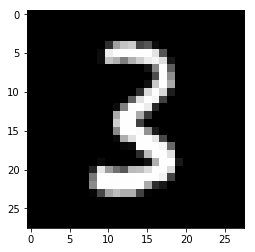

(tensor(0.1232, grad_fn=<NllLossBackward>), tensor(0.9688))

### Random sampling

We want our training set to be in a random order, and that order should differ each iteration. But the validation set shouldn't be randomized.

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

[tensor([8, 6, 2]), tensor([1, 7, 3]), tensor([9, 0, 5]), tensor([4])]

tensor(3)

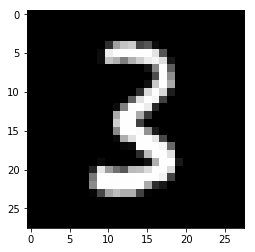

tensor(2)

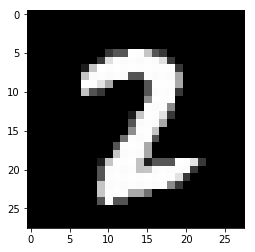

tensor(8)

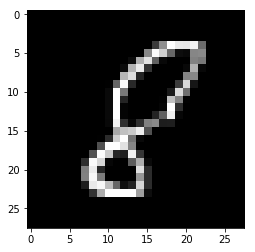

(tensor(0.1521, grad_fn=<NllLossBackward>), tensor(0.9531))

### PyTorch DataLoader

(tensor(0.1507, grad_fn=<NllLossBackward>), tensor(0.9531))

PyTorch's defaults work fine for most things however:

(tensor(0.1555, grad_fn=<NllLossBackward>), tensor(0.9062))

## Validation

You **always** should also have a [validation set](http://www.fast.ai/2017/11/13/validation-sets/), in order to identify if you are overfitting.

We will calculate and print the validation loss at the end of each epoch.

(Note that we always call `model.train()` before training, and `model.eval()` before inference, because these are used by layers such as `nn.BatchNorm2d` and `nn.Dropout` to ensure appropriate behaviour for these different phases.)

*Question*: Are these validation results correct is batch size varies?

`get_dls` returns dataloaders for the training and validation sets:

Now, our whole process of obtaining the data loaders and fitting the model can be run in 3 lines of code:

0 tensor(0.1379) tensor(0.9611)
1 tensor(0.1489) tensor(0.9545)
2 tensor(0.1037) tensor(0.9674)
3 tensor(0.0992) tensor(0.9696)
4 tensor(0.1617) tensor(0.9514)


## Export

Converted 03_minibatch_training.ipynb to nb_03.py
